In [1]:
import numpy as np

import pandas as pd

import astropy
from astropy import units as u

import matplotlib.pyplot as plt
%matplotlib inline



In [13]:
def distance_modulus(distance):
    """
    distance must be in parsecs
    """
    return 5.*np.log10(distance)-5
    

In [2]:
df1 = pd.read_csv('eisoenergies_diff_cosmo.txt', sep=',', skiprows=1)
df2 = pd.read_csv('eisoenergies_diff_H0.txt', sep=',', skiprows=1)

# remove duplicate to eiso1 in our other dataframe.
[df2.pop(col) for col in df2.columns if 'eiso1' in col];
df2.pop('DL1');

# rename columns 
colnames = df2.columns
colnames = colnames.str.replace('eiso2', 'eiso4')
colnames = colnames.str.replace('eiso3', 'eiso5')
colnames = colnames.str.replace('DL2', 'DL4')
colnames = colnames.str.replace('DL3', 'DL5')
df2.columns = colnames

In [3]:
# merge dataframes and keep only unique columns. The rest are repeats,
# hence our need to rename the cols we wanted to keep. 
df = pd.merge(df1, df2)

In [4]:
H0 = 67.8
Om = 0.308

```
Subscripts:
1) LCDM:          H0 = 67.8, Om = 0.308
2) Riess:         H0 = 67.8, Om = 0.308
3) Weyl Gravity:  H0 = 67.8
4) LCDM:          H0 = 65.0, Om = 0.308
5) LCDM:          H0 = 75.0, Om = 0.308
```

In [6]:
from luminositydistance import Cosmology

In [31]:
redshifts = np.linspace(0, 8, 100)

In [32]:
cosmo1 = Cosmology()
DLs1 = cosmo1.luminosity_distance(redshifts=redshifts, model='r', **{'H0':H0, 'Om':Om})
DLs1 = DLs1 * u.pc
DLs1 = np.asarray(DLs1)

# convert to cm
#DLs = np.asarray(DLs.to(u.cm))
#DLs

In [33]:
cosmo2 = Cosmology()
DLs2 = cosmo2.luminosity_distance(redshifts=redshifts, model='rerr', **{'H0':H0, 'Om':Om})
DLs2 = DLs2 * u.pc

DLs2 = np.asarray(DLs2)


# convert to cm
#DLs2 = np.asarray(DLs2.to(u.cm))
#DLs2

In [34]:
mu1 = distance_modulus(DLs1)

/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [35]:
mu2 = distance_modulus(DLs2)

/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [46]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [ ]:
plt.rcParams.keys()

In [58]:
plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5


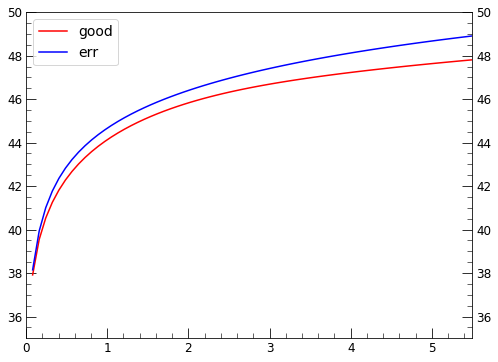

In [59]:
plt.figure(figsize=(8,6))
plt.plot(redshifts, mu1, '-', color='red', label='good')
plt.plot(redshifts, mu2, '-', color='blue', label='err')
plt.minorticks_on()
plt.ylim(35, 50)
plt.xlim(0, 5.5)
plt.legend(loc=0, fontsize=14)
plt.show()

In [14]:
kim = Cosmology()
DLs = kim.luminosity_distance(redshifts=redshifts, model='w', **{'H0':H0, 'Om':Om})

# DL units are in pc, apply astropy pc units
DLs = DLs * u.pc

# convert to cm
#DLs = np.asarray(DLs.to(u.cm))

DLs = np.asarray(DLs)

In [15]:
DLs

array([6.77861311e+10, 4.87173188e+10, 4.76755024e+09, 6.24633369e+09,
       1.68954240e+10, 2.10402159e+10, 6.18981891e+09, 7.79899315e+09,
       1.35177915e+10, 3.34022632e+10, 2.72725706e+10, 2.57456762e+10,
       3.99802075e+09, 2.76519047e+10, 2.34501613e+10, 3.22790357e+10,
       3.24442773e+09, 3.21473163e+09, 9.66053971e+09, 2.85060681e+09,
       1.14576222e+10, 2.10371583e+10, 1.19563166e+10, 5.35251378e+09,
       1.55993137e+10, 1.21968839e+10, 4.60001187e+09, 1.56127235e+10,
       1.65637542e+10, 1.15401264e+10, 6.32339286e+10, 2.24960661e+10,
       1.88223818e+09, 3.17240929e+10, 9.30746535e+09])